In [2]:
## Working with convolutional neural network
## This will also cover computer vision

## using torch vision for computer vision
## Looking into CNN
## End to end multi class image classification model
## Steps in modelling with CNN in pytorch


In [3]:
## Using convolutional neural networks with images is ideal
## NHWC - Number of images in the batch with height and width
## [batch_size, color_channel, height, width] - NCHW

## What is a convolutional neural network -


In [4]:
## Pytorch computer vision
 ## torch vision - base domain library for pytorch computer vision
 ## torch vision.datasets - get datasets and data loading functions from here
 ## torchvision.models - pretrained computer vision models which we can leverage for our own problems
 ## torchvision.transforms - manipulate the vision/image data to numbers/vectors
 ## torch.utils.data.Dataset - base dataset class for pytorch


import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## matplotlib
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [5]:
## Getting a computer vision dataset

## FashionMNIST - original MNIST database which is the numbers dataset. but this is for
## the FashionMNIST Dataset

train_data = datasets.FashionMNIST(
    root="data",  ## where to download the data to
    train=True, #do we want training or testing dataset
    download=True,
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data
    target_transform=None, ## how do we want to transform labels or targets


)
test_data = datasets.FashionMNIST(
     root="data",  ## where to download the data to
    train=False, #do we want training or testing dataset
    download=True,
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data
    target_transform=None,
)


In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
## Seeing the first training example
image, label= train_data[0]


In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_ids = train_data.class_to_idx
class_to_ids

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets ## the actual numerical values that the model should predict

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

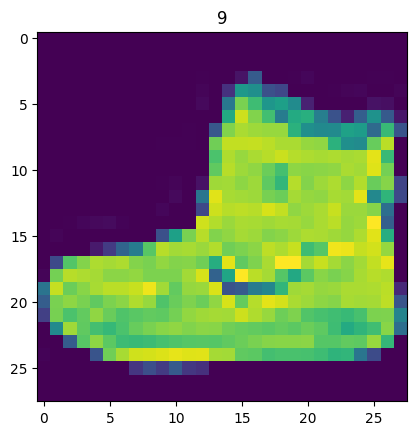

In [12]:
##  Visualize our data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

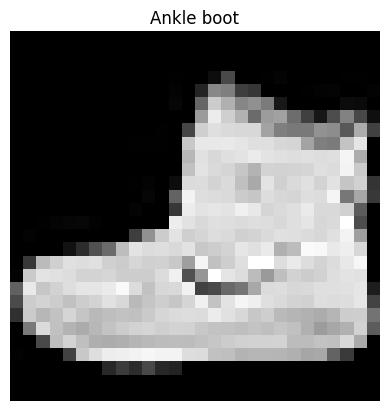

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

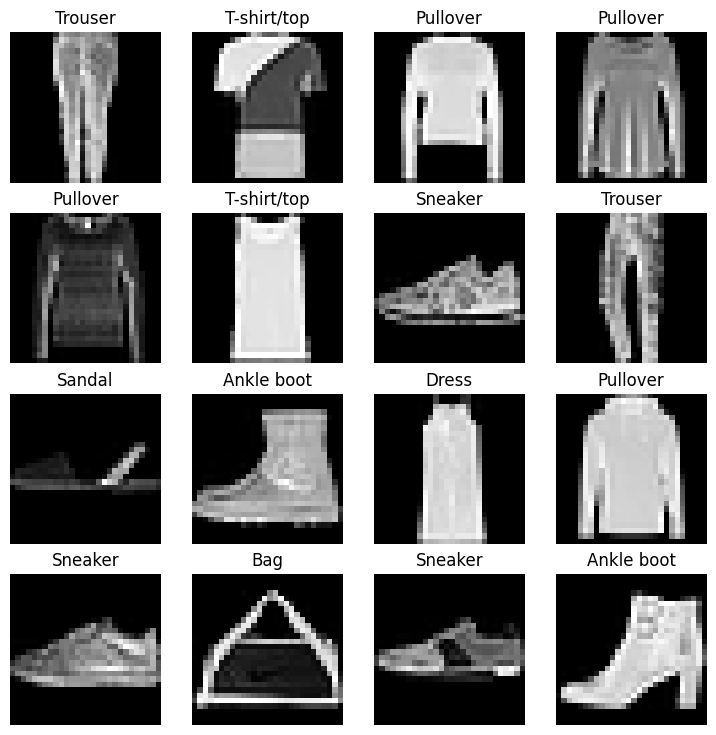

In [14]:

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [15]:
## These items of clothing can be modelled with pure linear lines or could you need non linearity
## Prepare dataloader
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
## We will convert it into dataloader
## converts our data set to a python iterator
## Specifically we want to turn our data more into batches

## it is more computationally effecient to break it down to batches so there are no issues looking at it
## we shall create a batch_size of 32
## given our neural network we will have to update our gradients per epoch

from torch.utils.data import DataLoader

#Set up the batch size hyper parameter
BATCH_SIZE = 32

#Turning the datasets into iterables - batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a6f34b73ee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a6f34d50b20>)

In [17]:
## Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a6f34b73ee0>, <torch.utils.data.dataloader.DataLoader object at 0x7a6f34d50b20>)
Length of the train_dataloader: 1875 batches of 32
Length of the test_dataloader: 313 batches of 32


In [18]:
## showing a sample
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label : 3, label size: torch.Size([])


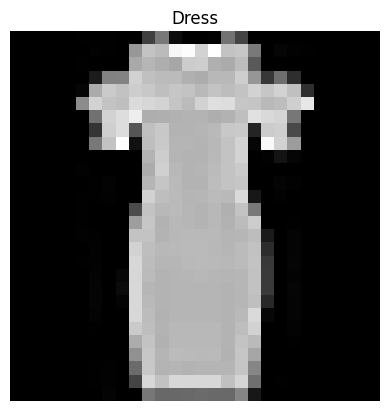

In [19]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label : {label}, label size: {label.shape}")

In [20]:
## Building out our first computer vision model

## starting to build a series of machine learning modelling it is the best to start with a
## a baseline model
## A baseline model is a simple model and then we improve it


## Creating a flatten layer
flatten_model = nn.Flatten()

## Get a single sample
x = train_features_batch[0]
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [21]:
x.shape

torch.Size([1, 28, 28])

In [22]:
## Flatten the sample
output = flatten_model(x)
print(f"Shape before -  { x.shape}")
print(f"Shape ater -  { output.shape} -> color channels, height*width ")

Shape before -  torch.Size([1, 28, 28])
Shape ater -  torch.Size([1, 784]) -> color channels, height*width 


In [23]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
              input_shape: int,
             hidden_units: int,
             output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
     nn.Flatten(),
     nn.Linear(in_features=input_shape, out_features=hidden_units),
     nn.Linear(in_features=hidden_units, out_features=output_shape)

     )

  def forward(self, x):
    return self.layer_stack(x)


In [24]:
torch.manual_seed(42)

#Setting up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,  ## 28*28
    hidden_units=10, ##how many hidden units in the inner layer
    output_shape=len(class_names)


).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [26]:
## We will be creating a optimizer and a loss function in order to train this network

##Loss function. -  since we are working with multiclass data our loss function will be -
## nn.CrossEntropyLoss()
## Optimizer is going to be. - torch.optim.SGD()
## Evaluation metric - since we are working on classification problem then we are going to use the
## evaluation method


In [27]:
import requests
from pathlib import Path

#Download the helper functions from the repo if it is not already downloaded
if Path("helper_functions.py").is_file():
  print("Helper functions already exist")
else:
  print("Downloading helper_functions.py")
  request   = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



Helper functions already exist


In [28]:
from helper_functions import accuracy_fn

## Setting up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [29]:
## Creating a function to time our experiments

## Check the model's performance - loss and the accuracy value
## how fast it runs
from timeit import default_timer as timer
def print_train_time(start: float, end:float, device: torch.device= None):
  ## Diff between start and end time
  total_time = end-start
  print(f"Train time on: {device} : {total_time: .3f} seconds")
  return total_time

In [30]:
start_time = timer()

## some code which are going to be the models


end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on: cpu :  0.000 seconds


3.901200000200333e-05

In [31]:
## Creating a training loop and training a model on batches of data
## optimizer will update the model's parameters once per batch rather than once per epoch


## loop through epochs
## loop through training batches, perform training steps and calculate the train loss per batch
## loop through the testing batches, perform testing steps, calculate the test loss per batch
## print out
## time everything



In [32]:
## Import tqdm for our progress bar
from tqdm.auto import tqdm

## Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#setting the number of epochs
epochs=3

## create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n")
  train_loss = 0
  ## Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    ##forward pass
    y_pred = model_0(X)

    ## calculate the loss per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss ##accumulate the training loss

    ## optimizer zero grad
    optimizer.zero_grad()

    ## loss backward
    loss.backward()
    ## optimizer step
    optimizer.step()

    ##printing out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  ## dividing the total train loss by length of the train data loader

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      ##Doing the forward pass
      test_pred = model_0(X_test)

      ##Calculate the loss
      test_loss += loss_fn(test_pred,y_test)

      ##calculating the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    ##calculate the test loss average per batch

    test_loss /= len(test_dataloader)

    ## calculate the test acc average per batch
    test_acc /= len(test_dataloader)
  print(f"Train Loss: {train_loss: .4f} | Test Loss: {test_loss: .4f} | Test Acc: {test_acc}")
train_time_end_on_cpu=timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss:  0.5904 | Test Loss:  0.5095 | Test Acc: 82.03873801916933
Epoch : 1 

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss:  0.4763 | Test Loss:  0.4799 | Test Acc: 83.19688498402556
Epoch : 2 

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss:  0.4550 | Test Loss:  0.4766 | Test Acc: 83.42651757188499
Train time on: cpu :  29.028 seconds


In [33]:
##evaluating our model and making predictions
## We will also create a function for multiple models

torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  ## returns a dict containing the results of the model prediciting the data loader
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    ## making predictions
    for X,y in tqdm(data_loader):
      y_pred = model(X)

      ##Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name" : model.__class__.__name__, "model_loss" : loss.item(), "model_acc" : acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [34]:
## Setting up device agnostic code for the GPU if there is one


In [35]:
## Set up device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [36]:
## Model 1 Building with non linearity

## Creating a model with non linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units
        ),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()

    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


In [37]:
## create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, ## 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [38]:
## Set up a loss optimizer, evaluation metrics

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [39]:
## Funcitionizing training, evaluation and testing loops
# Let us create a function for
#-> Training loop = train_step()
# -> testing loop = test_step()

def train_step(model:torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  ##performs training with the model trying to learn with the data loader
  train_loss, train_acc = 0,0

  model.train()
  ## Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)

    ##forward pass
    y_pred = model(X)

    ## calculate the loss per batch
    loss = loss_fn(y_pred,y)
    train_loss += loss ##accumulate the training loss
    ## from logits to prediction labels
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    ## optimizer zero grad
    optimizer.zero_grad()

    ## loss backward
    loss.backward()
    ## optimizer step
    optimizer.step()

    ##printing out what is happening
  ## dividing the total train loss by length of the train data loader

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss : {train_loss: .5f} | Train acc: {train_acc: .2f}%")

In [40]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  ##Putting the model in the eval mode

  model.eval()

  ## Turning on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader:
      ## Sending the data to the target device
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      ## Calculate the loss/ acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss: .5f} | Test acc: {test_acc: .4f}")

In [41]:
## Creating a testing loop
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

## Create a optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch} \n")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 

Train Loss :  1.09199 | Train acc:  61.34%
Test loss:  0.95636 | Test acc:  64.9960
Epoch : 1 

Train Loss :  0.78101 | Train acc:  71.93%
Test loss:  0.72227 | Test acc:  73.9117
Epoch : 2 

Train Loss :  0.67027 | Train acc:  75.94%
Test loss:  0.68500 | Test acc:  75.0200
Train time on: cuda :  33.552 seconds


In [42]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [43]:
 ## We can see above that our model did not beat the baseline requirement

## model 2 : building a convolutional neural network to find patterns in a visual data
## CNN's are also known as ConvNets
## CNN's are known for their capabilities to find patterns in the visual data
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [44]:
## Creating a convolutional neural network
## We got this from CNN Explainer github pages website
class FashionMNISTModelV2(nn.Module):
  ## Model arch that replicates the TinyVGG from the CNN explainer website
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    #A block is comprised of multiple layers and each layer got multiple sub layers
    ## 2D for two dimensional data
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  ## hyperparameters because we can set them ourselves

                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    ## This is the second block
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    ##We need a classifier for this as we need output in one dimensional layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x= self.conv_block_1(x)
    # print(f" Output shape of conv block_1 {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block_2 {x.shape}")
    x = self.classifier(x)
    return x




In [45]:

torch.manual_seed(42)
## our image is black and white so the color channel for that will only have one input_shape
## however in tinyVGG we can observe that it will have 3 as the input_shape

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [46]:
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [47]:
## 7.1 Stepping through nn.Conv2d()
torch.manual_seed(42)

##Creating a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test images: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test images: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [48]:
##Creating a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                      kernel_size=(3,3),
                       stride=1,
                       padding=0)

##passing the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
## this has created some random output with numbers
conv_output.shape

torch.Size([1, 10, 62, 62])

In [49]:
## Stepping through nn.MaxPool2d()
test_image.shape

torch.Size([3, 64, 64])

In [50]:
## printing out the original image without squeeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze dimension: {test_image.unsqueeze(0).shape}")

## Create a sample of nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)

## Pass data through the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through the conv_layer() : {test_image_through_conv.shape}")

## pass the data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through the conv_layer() : torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 62, 62])


In [51]:
torch.manual_seed(42)

##Creating a random tensor with similiar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))

#Creating a max pool layer
max_pool_layer= nn.MaxPool2d(kernel_size=2)

#passing it through the max pool layer
random_tensor
max_pool_tensor = max_pool_layer(random_tensor)
print(f" shape of random tensor : {random_tensor.shape}")
print(random_tensor)
print(f" shape of max pool layer tensor : {max_pool_tensor.shape}")
max_pool_tensor


 shape of random tensor : torch.Size([1, 1, 2, 2])
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
 shape of max pool layer tensor : torch.Size([1, 1, 1, 1])


tensor([[[[0.3367]]]])

In [52]:
print("Hello")

Hello


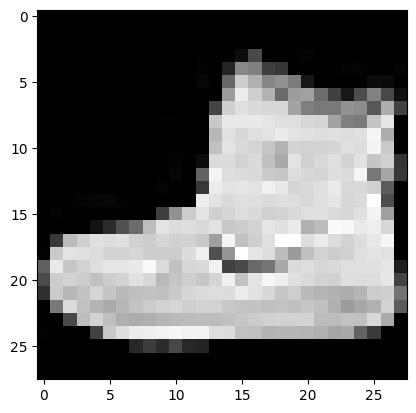

In [53]:
plt.imshow(image.squeeze(), cmap="gray")

In [54]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [55]:
##this will not work if we do not implement the 7*7 in the model defining step after flattening
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [56]:
## Setting up a loss function and an optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [57]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss :  0.58852 | Train acc:  78.61%
Test loss:  0.39635 | Test acc:  85.8926
Epoch: 1
---------
Train Loss :  0.36169 | Train acc:  86.88%
Test loss:  0.34668 | Test acc:  87.4002
Epoch: 2
---------
Train Loss :  0.32591 | Train acc:  88.23%
Test loss:  0.31380 | Test acc:  88.5284
Train time on: cuda :  39.091 seconds


In [58]:
!nvidia-smi

Mon Apr 29 04:16:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0              29W /  70W |    203MiB / 15360MiB |     10%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [59]:
##Getting the model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,

)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3137957453727722,
 'model_acc': 88.52835463258786}

In [60]:
## Creating a dataframe to compare the results
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results, model_2_results])

In [61]:
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.313796,88.528355


In [62]:
##Adding training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,29.027826
1,FashionMNISTModelV1,0.685001,75.019968,33.551957
2,FashionMNISTModelV2,0.313796,88.528355,39.091435


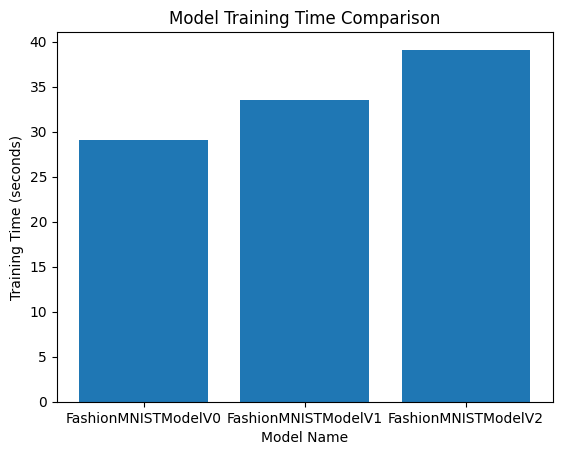

In [63]:
# @title Model Training Time Comparison

import matplotlib.pyplot as plt
plt.bar(compare_results['model_name'], compare_results['training_time'])
plt.xlabel('Model Name')
plt.ylabel('Training Time (seconds)')
_ = plt.title('Model Training Time Comparison')

Text(0, 0.5, 'model')

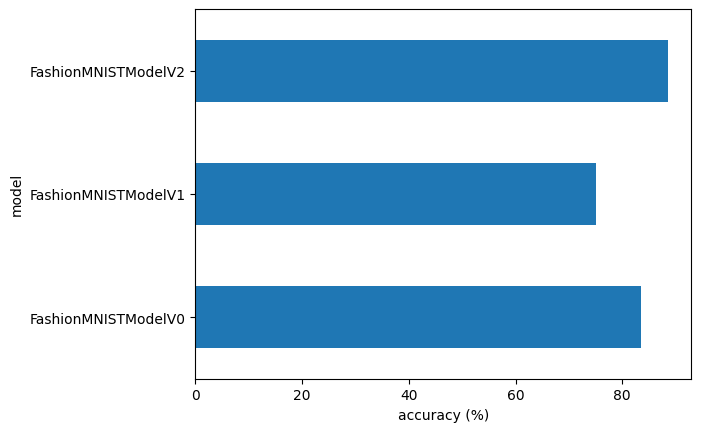

In [64]:
## Visualizing our models results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [65]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [66]:
import random
random.seed(42)
test_samples = []
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

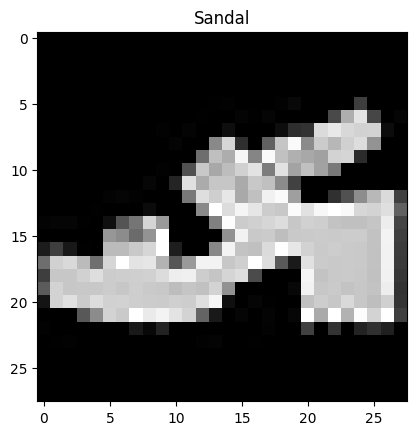

In [67]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [68]:
##Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[5.6424e-08, 4.9773e-08, 3.8123e-08, 2.2209e-07, 1.1257e-08, 9.9991e-01,
         2.3651e-07, 2.1268e-06, 2.4133e-06, 8.2684e-05],
        [2.4138e-02, 7.5254e-01, 3.5030e-04, 5.0435e-02, 3.8277e-02, 4.2697e-05,
         1.3337e-01, 7.5602e-05, 2.2766e-04, 5.4453e-04]])

In [69]:
## how to convert pred_probs to labels
## using arg max
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [70]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

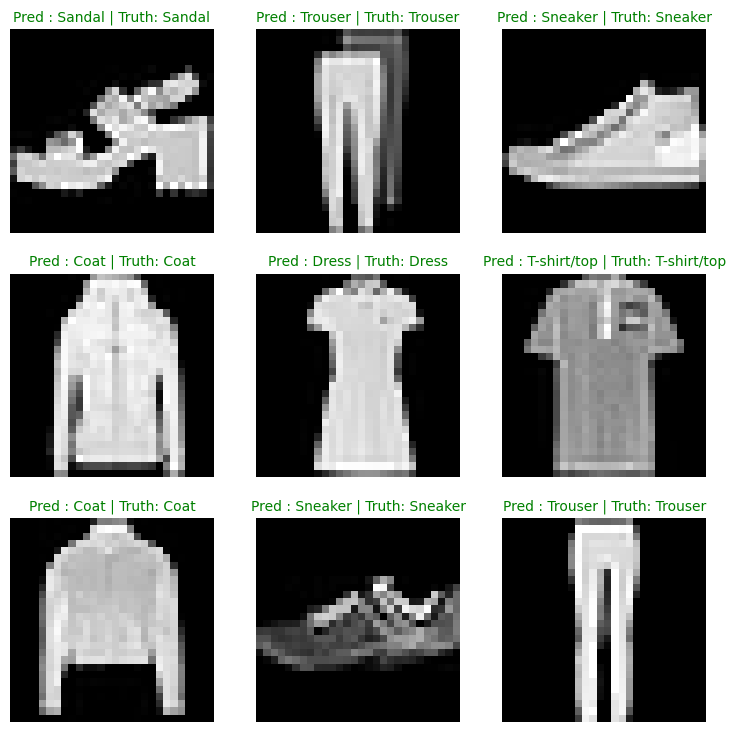

In [71]:
## Plotting the predictions
plt.figure(figsize=(9,9))
nrows= 3
ncols=3
for i, sample in enumerate(test_samples):
  ##creating a subplot
  plt.subplot(nrows,ncols,i+1)

  ## plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  ## finding the prediciton in the text form eg sandal
  pred_label = class_names[pred_classes[i]]

  ## get the truth label int he text form
  truth_label = class_names[test_labels[i]]

  ## creating a title for the plot
  title_text = f"Pred : {pred_label} | Truth: {truth_label}"

  ##checking for equality between pred and the truth and change the color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10,c="g") ## green text if the predictions are same as the truth
  else:
    plt.title(title_text, fontsize=10,c="red")
  plt.axis(False)


In [72]:
## Plotting a confusion matrix
## Make predictions with our trained model on the test dataset
## make a confusion matrix using torch metrics
## plot a confusion matrix using mlxtend.plotting.plot_confusion_matrix

import mlxtend

In [73]:
## import tqdm
from tqdm.auto import tqdm

## make predictions with trained model
y_preds =[]
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X,y = X.to(device), y.to(device)
    ##doing the forward pass
    y_logit = model_2(X)

    ##turning the predictions from logits to prediction probs to predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    ##putting the predicitons on cpu for more eval
    y_preds.append(y_pred.cpu())

##concatenate the list of the predictions into a tensor

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]



Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [74]:
len(y_pred_tensor)

10000

In [75]:
## installing the required


In [76]:
import torchmetrics, mlxtend

In [77]:
import mlxtend
print(mlxtend.__version__)

0.23.1


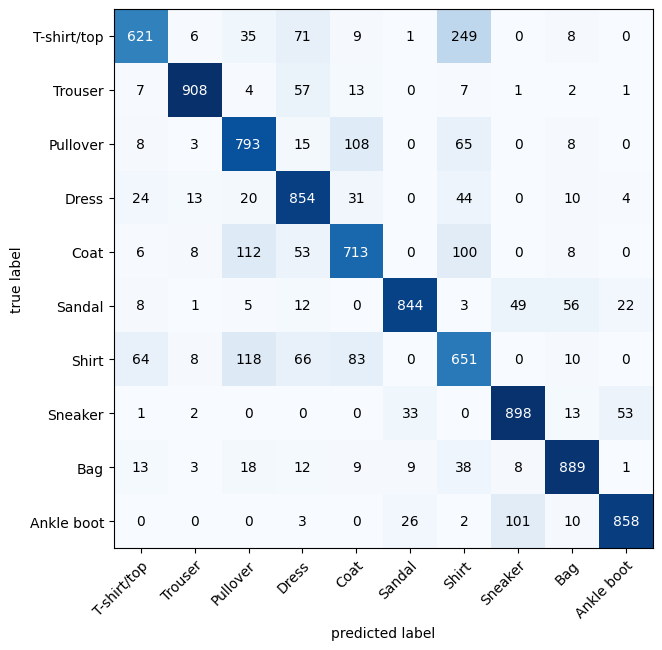

In [78]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

## set up a confusion instance and compare the predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

##plotting our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)


In [79]:
## The above confusion matrix describes the following
## the diagonal depicts that our model is pretty accurate
## however the high value of tshirt/top intersection with a shirt shows where our model
## fails to identify the label and the correct image


In [80]:
##Saving and loading our model
from pathlib import Path

# create a model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

## creating a model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

print(f"Saving the model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving the model to : models/03_pytorch_computer_vision_model_2.pth


In [81]:
## Creating a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

##loading the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [82]:
## Evaluate the model
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3137957453727722,
 'model_acc': 88.52835463258786}

In [83]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3137957453727722,
 'model_acc': 88.52835463258786}

In [84]:
##checking if the model results are close to each other
## for this we can use torch.isclase()


In [84]:
## custom datasets with pytorch
